In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv(r'C:\Users\Nikhil\Desktop\python projects\WineQualityPrediction\archive\wine-quality-white-and-red.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [60]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [61]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum().sum()

0

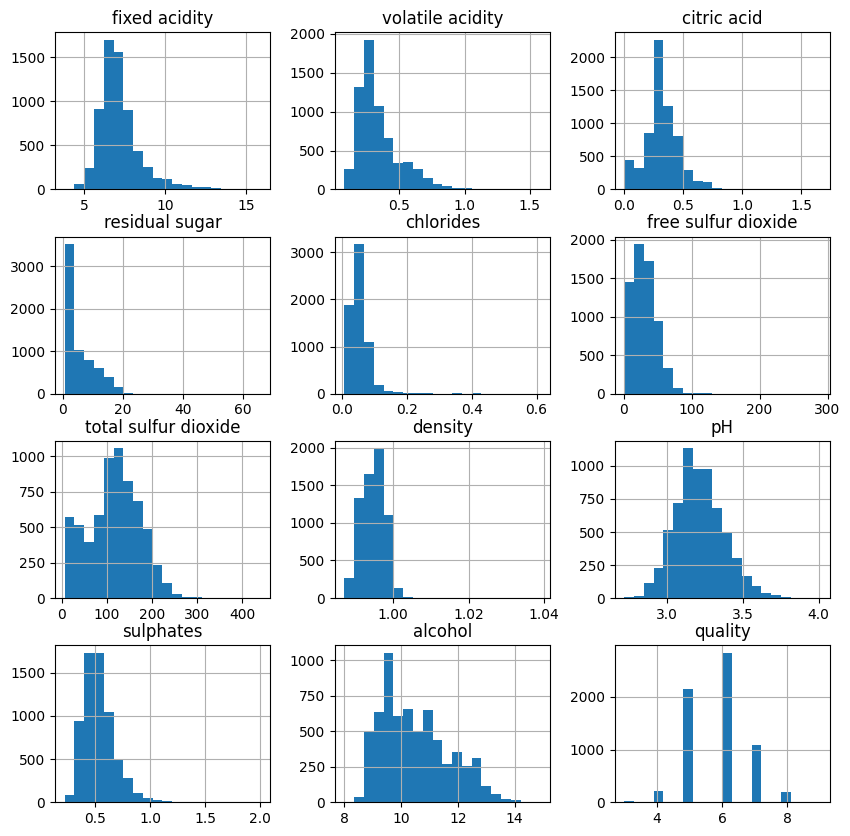

In [62]:
df.hist(bins=20,figsize=(10,10))
plt.show()

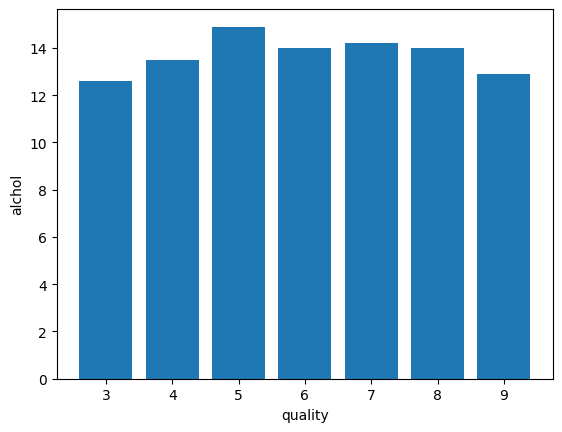

In [63]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alchol')
plt.show()

In [64]:
df.replace({'white': 1, 'red': 0}, inplace=True)


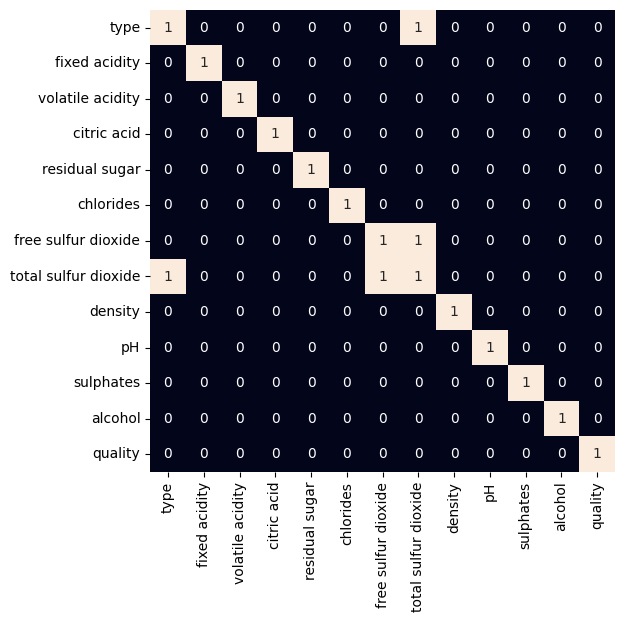

In [65]:
plt.figure(figsize=(6,6))
sb.heatmap(df.corr() > 0.7,annot=True,cbar=False)
plt.show()

In [66]:
df['best quality'] = [1 if x>5 else 0 for x in df.quality]

In [67]:
df = df.drop('total sulfur dioxide',axis=1)

In [68]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [69]:
features = df.drop(['quality','best quality'], axis=1)
target = df['best quality']

xtrain,xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [70]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [71]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain,ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7001627005362054
Validation Accuracy :  0.7164797008547008

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9815973253991634
Validation Accuracy :  0.8145699786324786

SVC() : 
Training Accuracy :  0.7050223212155263


In [72]:
print(metrics.classification_report(ytest,models[i].predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       468
           1       0.78      0.86      0.82       832

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300

